In [ ]:
import os
import zipfile
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
os.environ['KAGGLE_USERNAME'] = "dilarakarda"
os.environ['KAGGLE_KEY'] = "a14ff6686ee8fc5cea11b4aa18986878"

In [ ]:
print("Kullanıcı adı:", os.getenv('KAGGLE_USERNAME'))
print("Anahtar:", os.getenv('KAGGLE_KEY'))

Kullanıcı adı: dilarakarda
Anahtar: a14ff6686ee8fc5cea11b4aa18986878


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
os.makedirs(log_dir, exist_ok=True)

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)


In [ ]:
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/rice_leaf_disease/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

Found 4747 images belonging to 4 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/rice_leaf_disease/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1185 images belonging to 4 classes.


In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training_log.csv', append=True)
#early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Eğitim başlatılıyor
history1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[csv_logger]
)

#Performans Değerlendirmesi
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true_classes = val_generator.classes

print("\n--- Doğrulama Sınıflandırma Raporu ---")
print(classification_report(y_true_classes, y_pred_classes, digits=4))



--- 1. Aşama: Üst katmanları eğitme ---
Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1450s 19s/step - accuracy: 0.4710 - loss: 1.2055 - val_accuracy: 0.8397 - val_loss: 0.5513
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.8118 - loss: 0.5454 - val_accuracy: 0.8945 - val_loss: 0.3423
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.8808 - loss: 0.3687 - val_accuracy: 0.9316 - val_loss: 0.2445
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9084 - loss: 0.2945 - val_accuracy: 0.9519 - val_loss: 0.2009
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9234 - loss: 0.2284 - val_accuracy: 0.9578 - val_loss: 0.1667

--- Doğrulama Sınıflandırma Raporu ---
              precision    recall  f1-score   support

           0     0.9305    0.9747    0.9521       316
           1     0.9559    0.9028    0.9286       288
           2     0.9533    0.9563    0.9548       320
           3     1.0000    1.0000    1.0000       261

    accuracy   

In [ ]:
# Eğitim başlatılıyor
history1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[csv_logger]
)

#Performans Değerlendirmesi
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true_classes = val_generator.classes

print("\n--- Doğrulama Sınıflandırma Raporu ---")
print(classification_report(y_true_classes, y_pred_classes, digits=4))



--- 1. Aşama: Üst katmanları eğitme ---


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3379s 45s/step - accuracy: 0.4754 - loss: 1.1785 - val_accuracy: 0.8523 - val_loss: 0.5273
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.8340 - loss: 0.5178 - val_accuracy: 0.9139 - val_loss: 0.3217
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.8813 - loss: 0.3574 - val_accuracy: 0.9359 - val_loss: 0.2370
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.9108 - loss: 0.2774 - val_accuracy: 0.9460 - val_loss: 0.1922
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9295 - loss: 0.2250 - val_accuracy: 0.9705 - val_loss: 0.1500
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9370 - loss: 0.2026 - val_accuracy: 0.9654 - val_loss: 0.1402
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.9479 - loss: 0.1740 - val_accuracy: 0.9696 - val_loss: 0.1180
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9553 - loss: 0.1479 - val_accuracy: 0.9722 -

In [ ]:
# Eğitim başlatılıyor
history1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[csv_logger]
)

#Performans Değerlendirmesi
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true_classes = val_generator.classes

print("\n--- Doğrulama Sınıflandırma Raporu ---")
print(classification_report(y_true_classes, y_pred_classes, digits=4))



--- 1. Aşama: Üst katmanları eğitme ---
Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9949 - loss: 0.0306 - val_accuracy: 0.9966 - val_loss: 0.0198
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.9884 - loss: 0.0418 - val_accuracy: 0.9958 - val_loss: 0.0192
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9893 - loss: 0.0339 - val_accuracy: 0.9958 - val_loss: 0.0182
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9914 - loss: 0.0346 - val_accuracy: 0.9983 - val_loss: 0.0155
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9890 - loss: 0.0374 - val_accuracy: 0.9941 - val_loss: 0.0186
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9915 - loss: 0.0348 - val_accuracy: 0.9949 - val_loss: 0.0210
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9918 - loss: 0.0333 - val_accuracy: 0.9924 - val_loss: 0.0197
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.9946 

In [ ]:
# Eğitim başlatılıyor
history1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger]
)

#Performans Değerlendirmesi
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
val_generator.shuffle = False

y_true_classes = val_generator.classes

print("\n--- Doğrulama Sınıflandırma Raporu ---")
print(classification_report(y_true_classes, y_pred_classes, digits=4))


--- 1. Aşama: Üst katmanları eğitme ---
Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.9976 - loss: 0.0116 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9939 - loss: 0.0192 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.9959 - loss: 0.0135 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.9980 - loss: 0.0122 - val_accuracy: 0.9992 - val_loss: 0.0066
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9970 - loss: 0.0136 - val_accuracy: 0.9992 - val_loss: 0.0047
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9963 - loss: 0.0132 - val_accuracy: 0.9983 - val_loss: 0.0070
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9982 - loss: 0.0106 - val_accuracy: 0.9975 - val_loss: 0.0069
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.9972 

In [ ]:
#Değerlendirme
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9908 - loss: 0.0222
Validation Accuracy: 0.9915611743927002


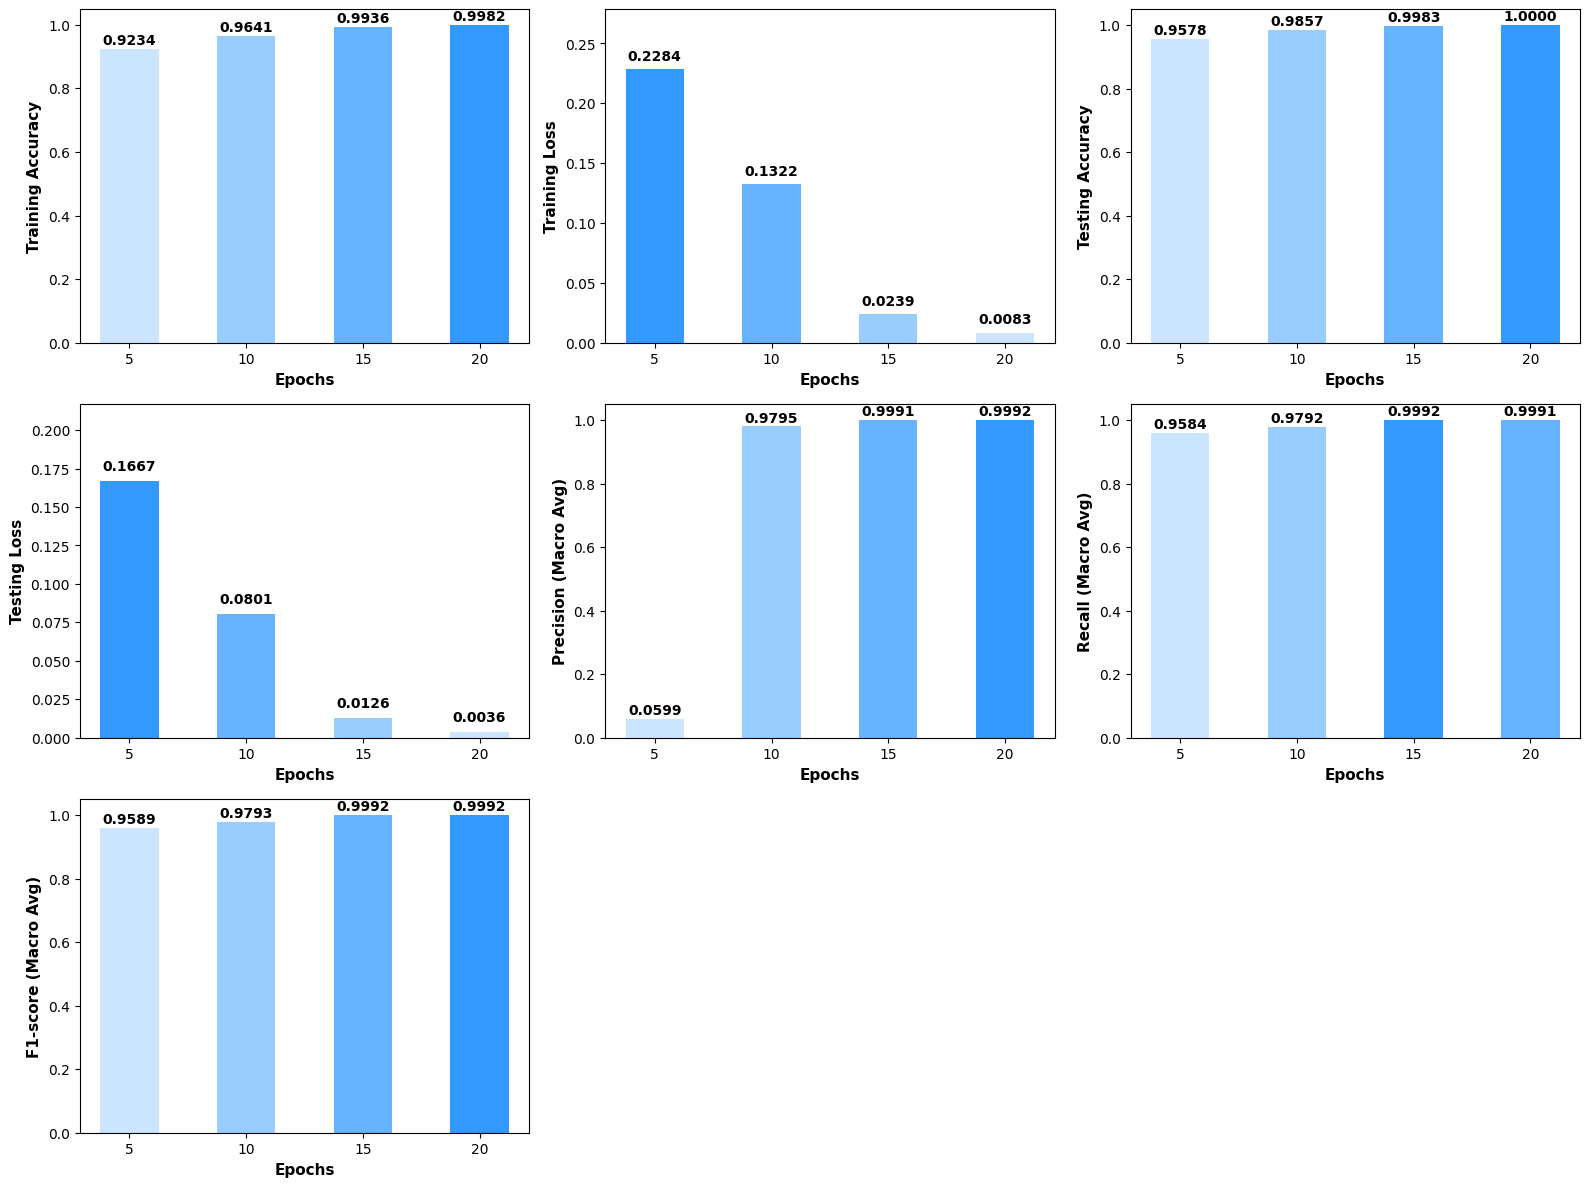

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epochs = [5, 10, 15, 20]
train_accuracy = [0.9234, 0.9641, 0.9936, 0.9982]
train_loss = [0.2284, 0.1322, 0.0239, 0.0083]
test_accuracy = [0.9578, 0.9857, 0.9983, 1.0000]
test_loss = [0.1667, 0.0801 , 0.0126, 0.0036]
precision_macro = [0.0599, 0.9795, 0.9991, 0.9992]
recall_macro = [0.9584, 0.9792, 0.9992, 0.9991]
f1_macro = [0.9589, 0.9793, 0.9992, 0.9992]

colors = ['#cce5ff', '#99ccff', '#66b3ff', '#3399ff', '#007acc']
metrics = [
    ("Training Accuracy", train_accuracy),
    ("Training Loss", train_loss),
    ("Testing Accuracy", test_accuracy),
    ("Testing Loss", test_loss),
    ("Precision (Macro Avg)", precision_macro),
    ("Recall (Macro Avg)", recall_macro),
    ("F1-score (Macro Avg)", f1_macro),
]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axs = axs.flatten()

for i, (title, values) in enumerate(metrics):
    sorted_indices = np.argsort(values)
    sorted_values = np.array(values)[sorted_indices]
    sorted_epochs = np.array(epochs)[sorted_indices]
    sorted_colors = [colors[j] for j in np.argsort(sorted_values)]


    bars = axs[i].bar(sorted_epochs, sorted_values, color=sorted_colors, width=2.5)
    #axs[i].set_title(title, fontsize=13, fontweight='bold')
    axs[i].set_xlabel("Epochs", fontsize=11, fontweight='bold')
    axs[i].set_ylabel(title, fontsize=11, fontweight='bold')
    axs[i].set_ylim(0, max(values) + 0.05)
    axs[i].set_xticks(epochs)

    for bar in bars:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2.0, height + 0.005,
                    f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

for j in range(len(metrics), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()